In [3]:
import numpy as np 
import random
import pandas as pd
import os
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from os import listdir
from os.path import isfile, join
import numpy
import cv2

import cv2
import shutil
from glob import glob
import matplotlib.pyplot as plt
import math
%matplotlib inline
print(tf.__version__)

2.2.0


In [11]:
benign_path = os.path.join('C:/Users/kzhan/Desktop/train/benign')
malignant_path = os.path.join('C:/Users/kzhan/Desktop/train/malignant')

benign_images = glob(os.path.join(benign_path, "*.jpg"))
malignant_images = glob(os.path.join(malignant_path, "*.jpg"))
malignant_images.extend(glob(os.path.join(malignant_path, "*.jpg")))

benign = {'class': 'benign',
         'path': benign_path,
         'images': benign_images}

malignant = {'class': 'malignant',
            'path': malignant_path,
            'images': malignant_images}

malignant_images_length = len(malignant_images)
benign_images_length = len(benign_images)

print('Total Malignant Images: {}', malignant_images_length)
print('Total Benign Images: {}', benign_images_length)

Total Malignant Images: {} 2394
Total Benign Images: {} 1440


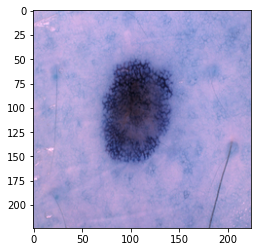

In [14]:
sample_benign_image = cv2.imread(os.path.join(benign_images[0]))
plt.imshow(sample_benign_image)

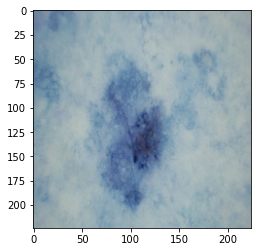

In [15]:
sample_malignant_image = cv2.imread(os.path.join(malignant_images[0]))
plt.imshow(sample_malignant_image)

In [20]:
train_dir = os.path.join('C:/Users/kzhan/Desktop/train')
test_dir = os.path.join('C:/Users/kzhan/Desktop/test')

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_benign = len(os.listdir('C:/Users/kzhan/Desktop/train/benign'))
train_malignant = len(os.listdir('C:/Users/kzhan/Desktop/train/malignant'))

test_benign = len(os.listdir('C:/Users/kzhan/Desktop/test/benign'))
test_malignant = len(os.listdir('C:/Users/kzhan/Desktop/test/malignant'))

total_train = train_benign + train_malignant
total_test = test_benign + test_malignant

train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255) 

In [21]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2637 images belonging to 2 classes.


In [22]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 660 images belonging to 2 classes.


In [24]:
model2 = Sequential()
model2.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(64, 4, padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(64, 3, padding = 'same', activation = 'relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(512, activation = 'relu'))
model2.add(Dense(1))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 64)        32832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [26]:
model2.inputs

[<tf.Tensor 'conv2d_3_input:0' shape=(None, 150, 150, 3) dtype=float32>]

In [28]:
model2.outputs

[<tf.Tensor 'dense_3/Identity:0' shape=(None, 1) dtype=float32>]

In [30]:
model2.compile(optimizer = 'adam',
             loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
             metrics = ['accuracy'])

In [33]:
history = model2.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=test_data_gen ,
    validation_steps=total_test // batch_size
)

Epoch 1/15
20/20 [==============================] - 33s 2s/step - loss: 0.3577 - accuracy: 0.8023 - val_loss: 0.3533 - val_accuracy: 0.8094
Epoch 2/15
20/20 [==============================] - 36s 2s/step - loss: 0.3556 - accuracy: 0.8127 - val_loss: 0.3689 - val_accuracy: 0.7891
Epoch 3/15
20/20 [==============================] - 36s 2s/step - loss: 0.3575 - accuracy: 0.8131 - val_loss: 0.4157 - val_accuracy: 0.8000
Epoch 4/15
20/20 [==============================] - 36s 2s/step - loss: 0.3687 - accuracy: 0.7916 - val_loss: 0.3768 - val_accuracy: 0.7984
Epoch 5/15
20/20 [==============================] - 36s 2s/step - loss: 0.3359 - accuracy: 0.8234 - val_loss: 0.3515 - val_accuracy: 0.8094
Epoch 6/15
20/20 [==============================] - 36s 2s/step - loss: 0.3164 - accuracy: 0.8246 - val_loss: 0.3601 - val_accuracy: 0.8203
Epoch 7/15
20/20 [==============================] - 37s 2s/step - loss: 0.2968 - accuracy: 0.8461 - val_loss: 0.3702 - val_accuracy: 0.8000
Epoch 8/15
20/20 [==

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

model2_json = model2.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(model2_json)

model2.save_weights("model2.h5")
print("Saved model to disk")

json_file = open('model2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model2.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

loaded_model = loaded_model

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

img = cv2.imread('220px-Normal_axial_T2-weighted_MR_image_of_the_brain.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])

classes = model.predict_classes(img)

print(classes)